# 논문내용 정리
이라크, 티크리트, 티크리트대학교, 이과대학 물리학과  
태양광 패널 효율에 영향을 미치는 기상 조건 논문  
  
단결정 실리콘의 태양 전지가 사용  
이론적인 효율은 약(16.276%)  
실효율은 날씨가 흐리고 표면이 빗물에 젖었을 때 최대효율(8.5258%)  
동일한 조건에서 표면이 건조할 때 최대 효율은 (14.5703%)  
대기가 깨끗하고 표면이 먼지로 덮여 있을 때 최대 효율은 (8.9502%)  
효율 수치 비교는 못하니 전제로 깔고 가자  
  
그림3 일사량 시간별 발전량 추세선  
젖은 상태에서 태양 전지판 표면의 효율 및 전력의 가장 큰 값을 발견했습니다.    
흐린날씨 건조한 패널 (가장 높은 발전량)  
깨끗한 패널, 먼지 묻은 패널 (가장 큰 발전량 차이)  
  
표면이 젖으면 건조했을 때보다 효율이 떨어지는데 물방울이 태양 복사열 산란시키기 때문입니다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta, datetime
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [160]:
df_raw = pd.read_csv('./용원님/기상발전_최종본.csv', encoding='euc-kr')

In [161]:
df_raw

,지역,일시,발전량,년,월,계절,평균 기온,최저 기온,최저 기온 시각,최고 기온,...,최고 해면 기압,최고 해면기압 시각,최저 해면기압,최저 해면기압 시각,평균 해면기압,가조시간,합계 일조 시간,평균 지면온도,최저 초상온도,일강수량
0,강원도,2017-01-01,154918.180,2017,1,겨울,6.0,1.5,639.0,9.8,...,1027.2,1007.0,1020.8,2354.0,1024.4,9.6,8.4,2.2,-2.7,0.0
1,강원도,2017-01-01,154918.180,2017,1,겨울,0.5,-3.9,844.0,5.5,...,1032.2,1007.0,1025.4,2346.0,1028.8,9.6,2.0,-0.5,-8.4,0.0
2,강원도,2017-01-01,154918.180,2017,1,겨울,-0.4,-5.5,507.0,5.8,...,1032.1,1004.0,1025.3,2353.0,1028.8,9.6,3.5,-0.2,-8.3,0.0
3,강원도,2017-01-01,154918.180,2017,1,겨울,0.2,-4.6,821.0,5.9,...,1029.8,213.0,1024.3,1442.0,1026.8,9.7,6.8,-1.8,-9.0,0.0
4,강원도,2017-01-01,154918.180,2017,1,겨울,-0.2,-6.2,735.0,6.1,...,1031.6,932.0,1024.7,2333.0,1028.2,9.6,4.9,-0.2,-10.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,충청북도,2021-12-31,836706.701,2021,12,겨울,-5.1,-8.6,744.0,-0.8,...,1033.5,2350.0,1028.8,13.0,1031.8,9.7,7.8,-1.3,-11.7,0.0
173531,충청북도,2021-12-31,836706.701,2021,12,겨울,-6.4,-11.4,2320.0,-1.9,...,1033.1,2327.0,1027.5,1.0,1030.9,9.7,7.9,-2.9,-14.2,0.0
173532,충청북도,2021-12-31,836706.701,2021,12,겨울,-4.6,-6.2,2340.0,-0.9,...,1033.2,1006.0,1028.6,1.0,1031.7,9.7,8.6,-1.3,-12.2,0.0
173533,충청북도,2021-12-31,836706.701,2021,12,겨울,-5.0,-8.3,605.0,0.5,...,1033.8,2349.0,1029.2,1.0,1032.1,9.7,8.7,-2.0,-13.5,0.0


In [162]:
df_raw.columns

Index(['지역', '일시', '발전량', '년', '월', '계절', '평균 기온', '최저 기온', '최저 기온 시각',
       '최고 기온', '최고 기온 시각', '최대 순간풍속', '최대 순간 풍속 풍향', '최대 순간풍속 시각', '최대 풍속',
       '최대 풍속 풍향', '최대 풍속 시각', '평균 풍속', '풍정합', '최다 풍향', '평균 이슬점온도', '최소 상대습도',
       '평균 상대습도 시각', '평균 상대습도', '평균 증기압', '평균 현지기압', '최고 해면 기압', '최고 해면기압 시각',
       '최저 해면기압', '최저 해면기압 시각', '평균 해면기압', '가조시간', '합계 일조 시간', '평균 지면온도',
       '최저 초상온도', '일강수량'],
      dtype='object')

In [ ]:
df = df_raw[['지역', '일시', '발전량', '년', '월', '계절', '평균 기온', '평균 이슬점온도', '평균 상대습도', '가조시간', '합계 일조 시간', '일강수량', '평균 풍속']]
df

In [ ]:
df.groupby(['지역', '일시']).mean()

In [ ]:
'''
봄: 3,4,5
여름: 6,7,8
가을: 9,10,11
겨울: 12,1,2
'''

In [ ]:
df_group = df.groupby(['지역', '일시']).mean()
df_group = df_group.reset_index()
df_group

In [ ]:
tmp = []
for i in df_group['월']:
    if 3.0 <= i and i <= 5.0:
        tmp.append('봄')
    elif 6.0 <= i and i <= 8.0:
        tmp.append('여름')
    elif 9.0 <= i and i <= 11.0:
        tmp.append('가을')
    elif 1.0 <= i and i <= 2.0 or i==12.0:
        tmp.append('겨울')

In [ ]:
df_group['계절'] = tmp

In [ ]:
df_group['월'] = df_group['월'].astype('int')

In [ ]:
df_group

실효율은 날씨가 흐리고 표면이 빗물에 젖었을 때 최대효율(8.5258%)  
동일한 조건에서 표면이 건조할 때 최대 효율은 (14.5703%)  
1.7배 차이

In [20]:
df_rain = df_group[df_group['일강수량'] != 0.0]
df_not_rain = df_group[df_group['일강수량'] == 0.0]

In [134]:
df_rain = df_rain.reset_index(drop=True)
df_not_rain = df_not_rain.reset_index(drop=True)

In [135]:
df_rain.describe()

,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,실효습도
count,8.725000e+03,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000
mean,8.121097e+05,2019.059484,6.673009,14.884940,10.349426,76.761678,12.454463,4.018126,8.156110,2.220454,61.661090
std,1.015436e+06,1.435138,3.235310,9.594842,11.088482,12.920074,1.711830,3.364575,16.499209,1.175062,9.357430
min,1.060051e+03,2017.000000,1.000000,-14.460000,-25.628571,24.026667,9.560000,0.000000,0.006250,0.400000,28.253456
25%,1.917106e+05,2018.000000,4.000000,6.950000,1.775000,68.950000,10.800000,0.675000,0.220000,1.400000,55.549022
50%,5.065228e+05,2019.000000,7.000000,17.287500,12.853333,78.840000,12.800000,3.550000,1.533333,1.906250,62.825145
75%,1.049150e+06,2020.000000,9.000000,22.985714,19.960000,86.540000,14.093750,6.900000,8.028571,2.735714,68.802659
max,9.959270e+06,2021.000000,12.000000,31.700000,27.800000,99.760000,14.800000,12.950000,215.930000,12.825000,81.178740


<AxesSubplot:xlabel='지역', ylabel='일강수량'>

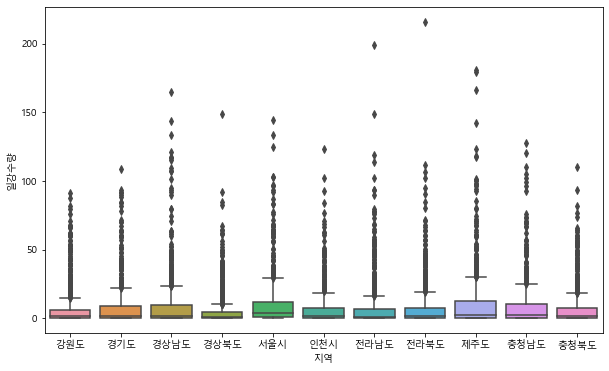

In [136]:
plt.figure(figsize=(10,6))
sns.boxplot(x='지역', y='일강수량', data=df_rain)

<AxesSubplot:xlabel='지역', ylabel='일강수량'>

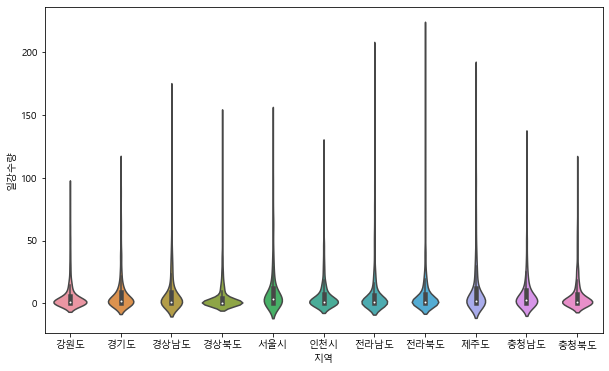

In [137]:
plt.figure(figsize=(10,6))
sns.violinplot(x='지역', y='일강수량', data=df_rain)

In [138]:
# 비가 내린날 일별 평균 발전량
# 비가 내린날 전체 발전량 / 전체 날짜수
df_rain['발전량'].sum() / len(df_rain)

812109.6797052148

In [139]:
# 비가 안 내린날 일별 평균 발전량
# 비가 안 내린날 전체 발전량 / 전체 날짜수
df_not_rain['발전량'].sum() / len(df_not_rain)

1108951.330806619

In [1]:
plt.bar('Rain', df_rain['발전량'].sum() / len(df_rain))
plt.bar('Not Rain', df_not_rain['발전량'].sum() / len(df_not_rain))
plt.save('강수에 따른 일평균 효율.png')
plt.show()

NameError: name 'plt' is not defined

In [251]:
(df_not_rain['발전량'].sum() / len(df_not_rain)) / (df_rain['발전량'].sum() / len(df_rain))

1.3655191638759359

건조한 날?  
계절, 평균 풍속, 평균 기온, 일조 시간

계절

In [ ]:
df_rain_season = df_rain.groupby('계절')[['발전량']].mean()
df_not_rain_season = df_not_rain.groupby('계절')[['발전량']].mean()

In [ ]:
df_rain_season = df_rain_season.reset_index()
df_not_rain_season = df_not_rain_season.reset_index()
df_rain_season['비'] = 1
df_not_rain_season['비'] = 0
df_season = pd.concat([df_rain_season, df_not_rain_season], ignore_index=True)
df_season

In [ ]:
sns.barplot(x='계절', y='발전량', hue='비', data=df_season)
plt.legend(loc=(1.0, 1.0))
plt.show()

평균 풍속

In [ ]:
df_rain.head()

In [ ]:
df_rain.describe()

In [ ]:
df_not_rain.describe()

In [ ]:
sns.violinplot(x='지역', y='평균 풍속', data=df_rain)

In [ ]:
sns.violinplot(x='지역', y='평균 풍속', data=df_not_rain)

기상청  
산불 발생 위험: 실효습도 50%  
건조 주의보: 실효습도 35% 이하 2일 이상 계속  
건조 경보: 실효습도 25% 이하 2일 이상 계속  

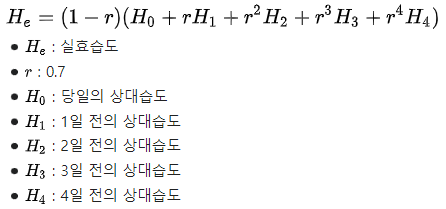

In [3]:
df_group = pd.read_csv('./df_group.csv', encoding='euc-kr')

In [ ]:
# df_group['일시'] = pd.to_datetime(df_group['일시'])

In [6]:
#today = date.today()
today = df_group['일시'][0]

#print(type(today))
#print(type(df_group['일시'][0]))
yesterday = today - timedelta(1)
 
print(today.strftime('%Y-%m-%d'))
print(yesterday.strftime('%Y-%m-%d'))

TypeError: unsupported operand type(s) for -: 'str' and 'datetime.timedelta'

In [4]:
df_2016 = pd.read_csv('./df_2016상대습도.csv', encoding='euc-kr')

In [ ]:
# df_2016['일시'] = pd.to_datetime(df_2016['일시'])

In [5]:
df_2016

,지역,일시,지점번호,평균 상대습도
0,강원도,2016-12-28,134.642857,65.292857
1,강원도,2016-12-29,134.642857,49.692857
2,강원도,2016-12-30,134.642857,54.292857
3,강원도,2016-12-31,134.642857,64.207143
4,경기도,2016-12-28,144.200000,55.320000
5,경기도,2016-12-29,144.200000,52.320000
6,경기도,2016-12-30,144.200000,60.960000
7,경기도,2016-12-31,144.200000,76.800000
8,경상남도,2016-12-28,240.437500,56.362500
9,경상남도,2016-12-29,240.437500,46.162500


In [21]:
def getAvgRhm(df, area='', date=''):
    con1 = df['지역'] == area
    con2 = df['일시'] == date
    tmp = df[con1 & con2]['평균 상대습도'].values
    return tmp[0]

In [22]:
getAvgRhm(df_2016, '강원도','2016-12-30')

54.29285714285714

# 2022.08.25

In [6]:
df_group.head()

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절
0,강원도,2017-01-01,154918.180,2017,1,1.942857,-3.392857,70.821429,9.621429,5.064286,0.000000,1.478571,겨울
1,강원도,2017-01-02,104640.902,2017,1,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000,겨울
2,강원도,2017-01-03,258526.982,2017,1,2.314286,-6.342857,58.150000,9.635714,7.392857,0.000000,1.814286,겨울
3,강원도,2017-01-04,259588.645,2017,1,2.657143,-4.421429,62.942857,9.664286,7.692857,0.000000,1.414286,겨울
4,강원도,2017-01-05,109151.179,2017,1,1.578571,-2.092857,78.457143,9.678571,0.892857,4.392857,1.464286,겨울


In [93]:
df_group

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절
0,강원도,2017-01-01,154918.180,2017,1,1.942857,-3.392857,70.821429,9.621429,5.064286,0.000000,1.478571,겨울
1,강원도,2017-01-02,104640.902,2017,1,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000,겨울
2,강원도,2017-01-03,258526.982,2017,1,2.314286,-6.342857,58.150000,9.635714,7.392857,0.000000,1.814286,겨울
3,강원도,2017-01-04,259588.645,2017,1,2.657143,-4.421429,62.942857,9.664286,7.692857,0.000000,1.414286,겨울
4,강원도,2017-01-05,109151.179,2017,1,1.578571,-2.092857,78.457143,9.678571,0.892857,4.392857,1.464286,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,충청북도,2021-12-27,612336.293,2021,12,-5.733333,-11.675000,64.841667,9.683333,5.491667,0.250000,1.366667,겨울
20082,충청북도,2021-12-28,260067.376,2021,12,-1.483333,-4.266667,82.183333,9.691667,0.600000,0.000000,0.641667,겨울
20083,충청북도,2021-12-29,281289.137,2021,12,1.625000,-3.300000,71.508333,9.691667,1.783333,0.033333,1.500000,겨울
20084,충청북도,2021-12-30,661147.861,2021,12,-1.883333,-9.341667,59.133333,9.708333,5.566667,0.825000,2.516667,겨울


##### 선생님이 알려준 방법

In [7]:
del df_2016['지점번호']

In [8]:
df_2016

,지역,일시,평균 상대습도
0,강원도,2016-12-28,65.292857
1,강원도,2016-12-29,49.692857
2,강원도,2016-12-30,54.292857
3,강원도,2016-12-31,64.207143
4,경기도,2016-12-28,55.320000
5,경기도,2016-12-29,52.320000
6,경기도,2016-12-30,60.960000
7,경기도,2016-12-31,76.800000
8,경상남도,2016-12-28,56.362500
9,경상남도,2016-12-29,46.162500


In [9]:
df_con = pd.concat([df_2016,df_group[['지역', '일시', '평균 상대습도']]])
df_con

,지역,일시,평균 상대습도
0,강원도,2016-12-28,65.292857
1,강원도,2016-12-29,49.692857
2,강원도,2016-12-30,54.292857
3,강원도,2016-12-31,64.207143
4,경기도,2016-12-28,55.320000
...,...,...,...
20081,충청북도,2021-12-27,64.841667
20082,충청북도,2021-12-28,82.183333
20083,충청북도,2021-12-29,71.508333
20084,충청북도,2021-12-30,59.133333


In [10]:
df_con = df_con.sort_values(['지역', '일시'])

In [11]:
df_con = df_con.reset_index(drop=True)
df_con

,지역,일시,평균 상대습도
0,강원도,2016-12-28,65.292857
1,강원도,2016-12-29,49.692857
2,강원도,2016-12-30,54.292857
3,강원도,2016-12-31,64.207143
4,강원도,2017-01-01,70.821429
...,...,...,...
20125,충청북도,2021-12-27,64.841667
20126,충청북도,2021-12-28,82.183333
20127,충청북도,2021-12-29,71.508333
20128,충청북도,2021-12-30,59.133333


In [118]:
df_con.sort_values('일시').tail()

,지역,일시,평균 상대습도
3659,경기도,2021-12-31,35.600000
16469,제주도,2021-12-31,60.625000
1829,강원도,2021-12-31,33.271429
12809,전라남도,2021-12-31,60.414286
20129,충청북도,2021-12-31,49.283333


In [116]:
df_con.sort_values('일시')['지역'].unique()

array(['강원도', '충청남도', '경상남도', '경기도', '충청북도', '전라북도', '서울시', '인천시', '전라남도',
       '경상북도', '제주도'], dtype=object)

In [113]:
area_test_ls = df_con['지역'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '서울시', '인천시', '전라남도', '전라북도', '제주도',
       '충청남도', '충청북도'], dtype=object)

In [12]:
area_test_ls = ['강원도', '경기도', '경상남도', '경상북도', '서울시', '인천시', '전라남도', '전라북도', '제주도', '충청남도', '충청북도']

he_test_ls = []
for area_test in area_test_ls:
    df_tmp = df_con[df_con['지역'] == area_test].reset_index(drop=True)
    df_h = df_tmp
    r = 0.7

    for idx in range(4, len(df_h)):
#         date_str = df_h['일시'][idx]
#         h0 = getAvgRhm(df_h, area, date_str)
        h0 = df_h['평균 상대습도'][idx]
        h1 = df_h['평균 상대습도'][idx-1]
        h2 = df_h['평균 상대습도'][idx-2]
        h3 = df_h['평균 상대습도'][idx-3]
        h4 = df_h['평균 상대습도'][idx-4]
        he = (1-r)*(h0 + r*h1 + r*r*h2 + r*r*r*h3 + r*r*r*r*h4)
        he_test_ls.append(he)

In [13]:
len(he_test_ls)

20086

In [123]:
he_ls

[52.52741807142857,
 54.839204357142854,
 53.3268795,
 53.474172642857134,
 57.731675357142855,
 59.67342835714287,
 60.56106450000001,
 63.3064782857143,
 58.41660728571429,
 49.312880357142866,
 40.825903714285715,
 36.91101171428571,
 34.061387571428575,
 31.572299142857144,
 32.56466871428571,
 37.963175142857146,
 39.74510742857143,
 43.50441042857143,
 46.91888014285715,
 52.64561228571428,
 55.19825035714287,
 49.88993957142857,
 47.633778857142865,
 45.704458928571434,
 43.80344464285715,
 42.38089992857143,
 42.08904064285716,
 43.06137857142857,
 50.01774214285715,
 54.904249285714286,
 54.15867642857143,
 50.09895578571429,
 46.138269642857146,
 45.699901714285716,
 45.91121935714286,
 49.092538714285716,
 47.7549105,
 49.25728864285715,
 47.994208071428574,
 45.11717507142857,
 41.32355764285714,
 40.73245478571428,
 41.01975085714285,
 41.99009464285713,
 44.24522292857144,
 42.947904214285714,
 42.85429714285714,
 44.101890428571444,
 40.47882385714286,
 43.6094865,
 45.2

In [127]:
sum(np.array(he_test_ls) == np.array(he_ls))

20086

In [14]:
df_group['실효습도'] = he_test_ls

In [15]:
df_group

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절,실효습도
0,강원도,2017-01-01,154918.180,2017,1,1.942857,-3.392857,70.821429,9.621429,5.064286,0.000000,1.478571,겨울,52.527418
1,강원도,2017-01-02,104640.902,2017,1,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000,겨울,54.839204
2,강원도,2017-01-03,258526.982,2017,1,2.314286,-6.342857,58.150000,9.635714,7.392857,0.000000,1.814286,겨울,53.326879
3,강원도,2017-01-04,259588.645,2017,1,2.657143,-4.421429,62.942857,9.664286,7.692857,0.000000,1.414286,겨울,53.474173
4,강원도,2017-01-05,109151.179,2017,1,1.578571,-2.092857,78.457143,9.678571,0.892857,4.392857,1.464286,겨울,57.731675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,충청북도,2021-12-27,612336.293,2021,12,-5.733333,-11.675000,64.841667,9.683333,5.491667,0.250000,1.366667,겨울,50.034604
20082,충청북도,2021-12-28,260067.376,2021,12,-1.483333,-4.266667,82.183333,9.691667,0.600000,0.000000,0.641667,겨울,56.487573
20083,충청북도,2021-12-29,281289.137,2021,12,1.625000,-3.300000,71.508333,9.691667,1.783333,0.033333,1.500000,겨울,57.403826
20084,충청북도,2021-12-30,661147.861,2021,12,-1.883333,-9.341667,59.133333,9.708333,5.566667,0.825000,2.516667,겨울,55.281879


In [131]:
df_group.to_csv('df_실효습도.csv', encoding='euc-kr', index=False)

##### 내가 한 방법 concat을 했어야 됐는데 merge하고 안되서 이렇게 함

In [ ]:
'''
2017-01-01
2017-01-02
2017-01-03
2017-01-04
'''

In [52]:
df_h = df_group
area = '강원도'
date_str = '2017-01-01'
date = pd.to_datetime(date_str)
r = 0.7

h0 = getAvgRhm(df_h, area, date_str)

dateh = date - timedelta(1)
if dateh.year == 2016:
    df_h = df_2016
dateh_str = dateh.strftime('%Y-%m-%d')
h1 = getAvgRhm(df_h, area, dateh_str)

dateh = date - timedelta(2)
if dateh.year == 2016:
    df_h = df_2016
dateh_str = dateh.strftime('%Y-%m-%d')
h2 = getAvgRhm(df_h, area, dateh_str)

dateh = date - timedelta(3)
if dateh.year == 2016:
    df_h = df_2016
dateh_str = dateh.strftime('%Y-%m-%d')
h3 = getAvgRhm(df_h, area, dateh_str)

dateh = date - timedelta(4)
if dateh.year == 2016:
    df_h = df_2016
dateh_str = dateh.strftime('%Y-%m-%d')
h4 = getAvgRhm(df_h, area, dateh_str)

# print(date.strftime('%Y-%m-%d'))
# print(dateh.strftime('%Y-%m-%d'))
# print(dateh.year)
# print(type(dateh.strftime('%Y-%m-%d')))

print(h0)
print(h1)
print(h2)
print(h3)
print(h4)
print()

he = (1-r)*(h0 + r*h1 + r*r*h2 + r*r*r*h3 + r*r*r*r*h4)
print(he)

78.45714285714287
62.942857142857136
58.15
71.20714285714286
70.82142857142857

57.731675357142855


In [68]:
date_ls = pd.date_range('2017-01-01', '2021-12-31')

In [69]:
date_ls

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [74]:
date_str_ls = []
for i in date_ls:
    date_str_ls.append(i.strftime('%Y-%m-%d'))

In [75]:
date_str_ls

['2017-01-01',
 '2017-01-02',
 '2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-07',
 '2017-01-08',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11',
 '2017-01-12',
 '2017-01-13',
 '2017-01-14',
 '2017-01-15',
 '2017-01-16',
 '2017-01-17',
 '2017-01-18',
 '2017-01-19',
 '2017-01-20',
 '2017-01-21',
 '2017-01-22',
 '2017-01-23',
 '2017-01-24',
 '2017-01-25',
 '2017-01-26',
 '2017-01-27',
 '2017-01-28',
 '2017-01-29',
 '2017-01-30',
 '2017-01-31',
 '2017-02-01',
 '2017-02-02',
 '2017-02-03',
 '2017-02-04',
 '2017-02-05',
 '2017-02-06',
 '2017-02-07',
 '2017-02-08',
 '2017-02-09',
 '2017-02-10',
 '2017-02-11',
 '2017-02-12',
 '2017-02-13',
 '2017-02-14',
 '2017-02-15',
 '2017-02-16',
 '2017-02-17',
 '2017-02-18',
 '2017-02-19',
 '2017-02-20',
 '2017-02-21',
 '2017-02-22',
 '2017-02-23',
 '2017-02-24',
 '2017-02-25',
 '2017-02-26',
 '2017-02-27',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-04',
 '2017-03-05',
 '2017-03-06',
 '2017-03-07',
 '2017-03-

In [72]:
date_ls[0].strftime('%Y-%m-%d')

'2017-01-01'

In [73]:
type(date_ls[0].strftime('%Y-%m-%d'))

str

In [55]:
len(tmp)

1826

In [82]:
len(df_group)

20086

In [79]:
area_ls = list(df_group['지역'])

In [89]:
area_ls[0]

'강원도'

In [84]:
date_str_ls = list(df_group['일시'])

In [86]:
len(date_str_ls)

20086

In [87]:
range(len(area_ls))

range(0, 20086)

In [92]:
he_ls = []

for idx in range(len(area_ls)):
    df_h = df_group
    area = area_ls[idx]
    date_str = date_str_ls[idx]
    date = pd.to_datetime(date_str)
    r = 0.7

    h0 = getAvgRhm(df_h, area, date_str)

    dateh = date - timedelta(1)
    if dateh.year == 2016:
        df_h = df_2016
    dateh_str = dateh.strftime('%Y-%m-%d')
    h1 = getAvgRhm(df_h, area, dateh_str)

    dateh = date - timedelta(2)
    if dateh.year == 2016:
        df_h = df_2016
    dateh_str = dateh.strftime('%Y-%m-%d')
    h2 = getAvgRhm(df_h, area, dateh_str)

    dateh = date - timedelta(3)
    if dateh.year == 2016:
        df_h = df_2016
    dateh_str = dateh.strftime('%Y-%m-%d')
    h3 = getAvgRhm(df_h, area, dateh_str)

    dateh = date - timedelta(4)
    if dateh.year == 2016:
        df_h = df_2016
    dateh_str = dateh.strftime('%Y-%m-%d')
    h4 = getAvgRhm(df_h, area, dateh_str)

    he = (1-r)*(h0 + r*h1 + r*r*h2 + r*r*r*h3 + r*r*r*r*h4)
    he_ls.append(he)

In [94]:
he_ls

[52.52741807142857,
 54.839204357142854,
 53.3268795,
 53.474172642857134,
 57.731675357142855,
 59.67342835714287,
 60.56106450000001,
 63.3064782857143,
 58.41660728571429,
 49.312880357142866,
 40.825903714285715,
 36.91101171428571,
 34.061387571428575,
 31.572299142857144,
 32.56466871428571,
 37.963175142857146,
 39.74510742857143,
 43.50441042857143,
 46.91888014285715,
 52.64561228571428,
 55.19825035714287,
 49.88993957142857,
 47.633778857142865,
 45.704458928571434,
 43.80344464285715,
 42.38089992857143,
 42.08904064285716,
 43.06137857142857,
 50.01774214285715,
 54.904249285714286,
 54.15867642857143,
 50.09895578571429,
 46.138269642857146,
 45.699901714285716,
 45.91121935714286,
 49.092538714285716,
 47.7549105,
 49.25728864285715,
 47.994208071428574,
 45.11717507142857,
 41.32355764285714,
 40.73245478571428,
 41.01975085714285,
 41.99009464285713,
 44.24522292857144,
 42.947904214285714,
 42.85429714285714,
 44.101890428571444,
 40.47882385714286,
 43.6094865,
 45.2

In [95]:
len(he_ls)

20086

In [132]:
df_group

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절,실효습도
0,강원도,2017-01-01,154918.180,2017,1,1.942857,-3.392857,70.821429,9.621429,5.064286,0.000000,1.478571,겨울,52.527418
1,강원도,2017-01-02,104640.902,2017,1,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000,겨울,54.839204
2,강원도,2017-01-03,258526.982,2017,1,2.314286,-6.342857,58.150000,9.635714,7.392857,0.000000,1.814286,겨울,53.326879
3,강원도,2017-01-04,259588.645,2017,1,2.657143,-4.421429,62.942857,9.664286,7.692857,0.000000,1.414286,겨울,53.474173
4,강원도,2017-01-05,109151.179,2017,1,1.578571,-2.092857,78.457143,9.678571,0.892857,4.392857,1.464286,겨울,57.731675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,충청북도,2021-12-27,612336.293,2021,12,-5.733333,-11.675000,64.841667,9.683333,5.491667,0.250000,1.366667,겨울,50.034604
20082,충청북도,2021-12-28,260067.376,2021,12,-1.483333,-4.266667,82.183333,9.691667,0.600000,0.000000,0.641667,겨울,56.487573
20083,충청북도,2021-12-29,281289.137,2021,12,1.625000,-3.300000,71.508333,9.691667,1.783333,0.033333,1.500000,겨울,57.403826
20084,충청북도,2021-12-30,661147.861,2021,12,-1.883333,-9.341667,59.133333,9.708333,5.566667,0.825000,2.516667,겨울,55.281879


In [16]:
df_hum_he75 = df_group[(65 < df_group['실효습도']) & (df_group['실효습도'] <= 75)]
df_hum_he65 = df_group[(50 < df_group['실효습도']) & (df_group['실효습도'] <= 65)]
df_hum_he50 = df_group[(35 < df_group['실효습도']) & (df_group['실효습도'] <= 50)]
df_hum_he35 = df_group[(25 < df_group['실효습도']) & (df_group['실효습도'] <= 35)]
df_hum_he25 = df_group[(0 < df_group['실효습도']) & (df_group['실효습도'] <= 25)]

# df_dry65 = df_group[df_group['실효습도'] <= 65]
# df_dry50 = df_group[df_group['실효습도'] <= 50]
# df_dry35 = df_group[df_group['실효습도'] <= 35]
# df_dry25 = df_group[df_group['실효습도'] <= 25]

In [17]:
df_rain_hum_he75 = df_group[(df_group['일강수량'] != 0.0) & (65 < df_group['실효습도']) & (df_group['실효습도'] <= 75)]
df_rain_hum_he65 = df_group[(df_group['일강수량'] != 0.0) & (50 < df_group['실효습도']) & (df_group['실효습도'] <= 65)]
df_rain_hum_he50 = df_group[(df_group['일강수량'] != 0.0) & (35 < df_group['실효습도']) & (df_group['실효습도'] <= 50)]
df_rain_hum_he35 = df_group[(df_group['일강수량'] != 0.0) & (25 < df_group['실효습도']) & (df_group['실효습도'] <= 35)]
df_rain_hum_he35_under = df_group[(df_group['일강수량'] != 0.0) & (df_group['실효습도'] < 35)]

In [18]:
df_not_rain_hum_he75 = df_group[(df_group['일강수량'] == 0.0) & (65 < df_group['실효습도']) & (df_group['실효습도'] <= 75)]
df_not_rain_hum_he65 = df_group[(df_group['일강수량'] == 0.0) & (50 < df_group['실효습도']) & (df_group['실효습도'] <= 65)]
df_not_rain_hum_he50 = df_group[(df_group['일강수량'] == 0.0) & (35 < df_group['실효습도']) & (df_group['실효습도'] <= 50)]
df_not_rain_hum_he35 = df_group[(df_group['일강수량'] == 0.0) & (25 < df_group['실효습도']) & (df_group['실효습도'] <= 35)]
df_not_rain_hum_he25 = df_group[(df_group['일강수량'] == 0.0) & (0 < df_group['실효습도']) & (df_group['실효습도'] <= 25)]

##### 너무 건조하면 오히려 손해더라

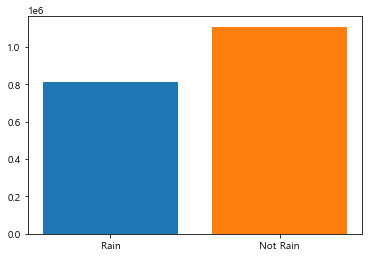

In [22]:
plt.bar('Rain', df_rain['발전량'].sum() / len(df_rain))
plt.bar('Not Rain', df_not_rain['발전량'].sum() / len(df_not_rain))
plt.savefig('강수에 따른 일 평균 발전량 효율.png')
plt.show()

In [276]:
(df_rain['발전량'].sum() / len(df_rain)) / (df_not_rain['발전량'].sum() / len(df_not_rain))

0.7323222012949024

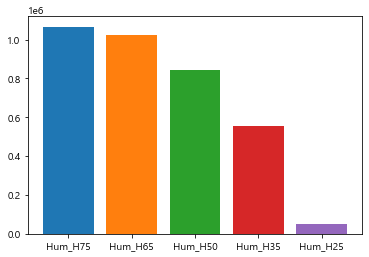

In [23]:
plt.bar('Hum_H75', df_hum_he75['발전량'].sum() / len(df_hum_he75))
plt.bar('Hum_H65', df_hum_he65['발전량'].sum() / len(df_hum_he65))
plt.bar('Hum_H50', df_hum_he50['발전량'].sum() / len(df_hum_he50))
plt.bar('Hum_H35', df_hum_he35['발전량'].sum() / len(df_hum_he35))
plt.bar('Hum_H25', df_hum_he25['발전량'].sum() / len(df_hum_he25))
plt.savefig('Hum_H75_25.png')
plt.show()

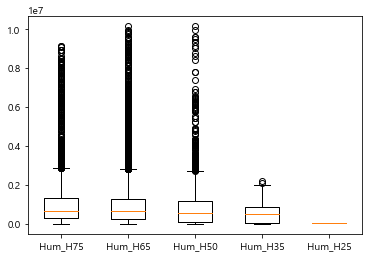

In [26]:
plt.boxplot([df_hum_he75['발전량'], df_hum_he65['발전량'], df_hum_he50['발전량'], df_hum_he35['발전량'], df_hum_he25['발전량']])

plt.xticks([1, 2, 3, 4, 5], ['Hum_H75', 'Hum_H65', 'Hum_H50', 'Hum_H35', 'Hum_H25'])
#plt.xticks(rotation=90)
plt.savefig('Hum_H75_25_box.png')
plt.show()

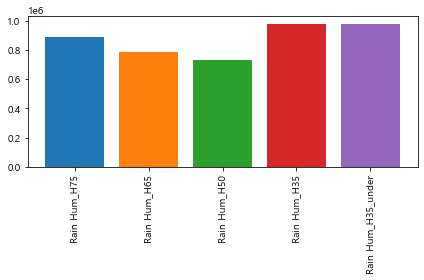

In [33]:
# plt.figure(figsize=(8, 6))
plt.bar('Rain Hum_H75', df_rain_hum_he75['발전량'].sum() / len(df_rain_hum_he75))
plt.bar('Rain Hum_H65', df_rain_hum_he65['발전량'].sum() / len(df_rain_hum_he65))
plt.bar('Rain Hum_H50', df_rain_hum_he50['발전량'].sum() / len(df_rain_hum_he50))
plt.bar('Rain Hum_H35', df_rain_hum_he35['발전량'].sum() / len(df_rain_hum_he35))
plt.bar('Rain Hum_H35_under', df_rain_hum_he35_under['발전량'].sum() / len(df_rain_hum_he35_under))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Rain Hum_H75_25.png')
plt.show()

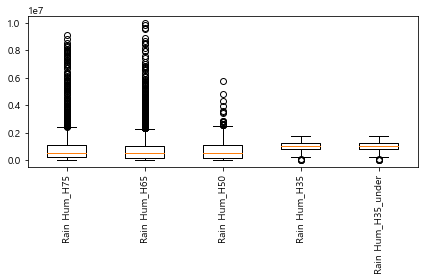

In [34]:
plt.boxplot([df_rain_hum_he75['발전량'], df_rain_hum_he65['발전량'], df_rain_hum_he50['발전량'], df_rain_hum_he35['발전량'], df_rain_hum_he35_under['발전량']])

plt.xticks([1, 2, 3, 4, 5], ['Rain Hum_H75', 'Rain Hum_H65', 'Rain Hum_H50', 'Rain Hum_H35', 'Rain Hum_H35_under'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Rain Hum_H75_25_box.png')
plt.show()

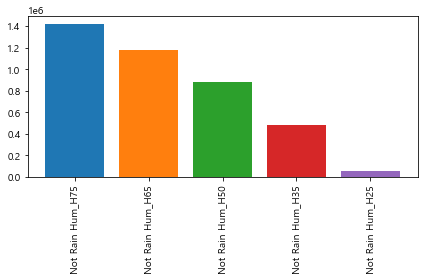

In [35]:
plt.bar('Not Rain Hum_H75', df_not_rain_hum_he75['발전량'].sum() / len(df_not_rain_hum_he75))
plt.bar('Not Rain Hum_H65', df_not_rain_hum_he65['발전량'].sum() / len(df_not_rain_hum_he65))
plt.bar('Not Rain Hum_H50', df_not_rain_hum_he50['발전량'].sum() / len(df_not_rain_hum_he50))
plt.bar('Not Rain Hum_H35', df_not_rain_hum_he35['발전량'].sum() / len(df_not_rain_hum_he35))
plt.bar('Not Rain Hum_H25', df_not_rain_hum_he25['발전량'].sum() / len(df_not_rain_hum_he25))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Not Rain Hum_H75_25.png')
plt.show()

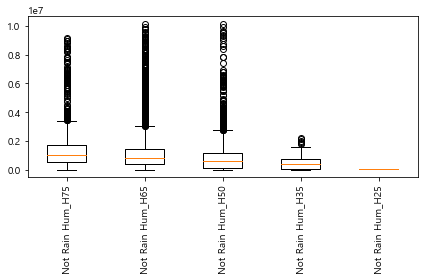

In [36]:
plt.boxplot([df_not_rain_hum_he75['발전량'], df_not_rain_hum_he65['발전량'], df_not_rain_hum_he50['발전량'], df_not_rain_hum_he35['발전량'], df_not_rain_hum_he25['발전량']])

plt.xticks([1, 2, 3, 4, 5], ['Not Rain Hum_H75', 'Not Rain Hum_H65', 'Not Rain Hum_H50', 'Not Rain Hum_H35', 'Not Rain Hum_H25'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Not Rain Hum_H75_25_box.png')
plt.show()

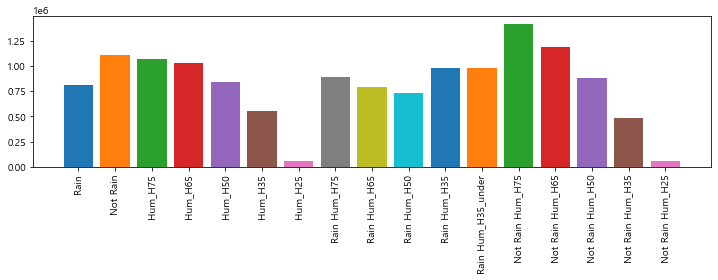

In [37]:
plt.figure(figsize=(10,4))
plt.bar('Rain', df_rain['발전량'].sum() / len(df_rain))
plt.bar('Not Rain', df_not_rain['발전량'].sum() / len(df_not_rain))

plt.bar('Hum_H75', df_hum_he75['발전량'].sum() / len(df_hum_he75))
plt.bar('Hum_H65', df_hum_he65['발전량'].sum() / len(df_hum_he65))
plt.bar('Hum_H50', df_hum_he50['발전량'].sum() / len(df_hum_he50))
plt.bar('Hum_H35', df_hum_he35['발전량'].sum() / len(df_hum_he35))
plt.bar('Hum_H25', df_hum_he25['발전량'].sum() / len(df_hum_he25))

plt.bar('Rain Hum_H75', df_rain_hum_he75['발전량'].sum() / len(df_rain_hum_he75))
plt.bar('Rain Hum_H65', df_rain_hum_he65['발전량'].sum() / len(df_rain_hum_he65))
plt.bar('Rain Hum_H50', df_rain_hum_he50['발전량'].sum() / len(df_rain_hum_he50))
plt.bar('Rain Hum_H35', df_rain_hum_he35['발전량'].sum() / len(df_rain_hum_he35))
plt.bar('Rain Hum_H35_under', df_rain_hum_he35_under['발전량'].sum() / len(df_rain_hum_he35_under))

plt.bar('Not Rain Hum_H75', df_not_rain_hum_he75['발전량'].sum() / len(df_not_rain_hum_he75))
plt.bar('Not Rain Hum_H65', df_not_rain_hum_he65['발전량'].sum() / len(df_not_rain_hum_he65))
plt.bar('Not Rain Hum_H50', df_not_rain_hum_he50['발전량'].sum() / len(df_not_rain_hum_he50))
plt.bar('Not Rain Hum_H35', df_not_rain_hum_he35['발전량'].sum() / len(df_not_rain_hum_he35))
plt.bar('Not Rain Hum_H25', df_not_rain_hum_he25['발전량'].sum() / len(df_not_rain_hum_he25))

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Hum_H75_25_total.png')
plt.show()

##### 그냥 평균 상대습도로 보면 어떨까?

In [297]:
df_rain.corr()

,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,실효습도
발전량,1.000000,0.278584,0.005243,0.112497,0.059331,-0.129880,0.107959,0.400536,-0.179284,-0.014330,0.021984
년,0.278584,1.000000,-0.008277,0.041533,0.059261,0.089566,0.035231,-0.035850,0.019208,-0.029451,0.128077
월,0.005243,-0.008277,1.000000,0.259102,0.261829,0.160862,-0.109751,-0.046375,0.051735,-0.115919,0.258912
평균 기온,0.112497,0.041533,0.259102,1.000000,0.974347,0.548087,0.802744,-0.064177,0.230497,-0.213789,0.646531
평균 이슬점온도,0.059331,0.059261,0.261829,0.974347,1.000000,0.720227,0.767943,-0.207869,0.300884,-0.231399,0.760128
평균 상대습도,-0.129880,0.089566,0.160862,0.548087,0.720227,1.000000,0.399019,-0.580606,0.433671,-0.223077,0.833300
가조시간,0.107959,0.035231,-0.109751,0.802744,0.767943,0.399019,1.000000,-0.004010,0.196873,-0.180301,0.446943
합계 일조 시간,0.400536,-0.035850,-0.046375,-0.064177,-0.207869,-0.580606,-0.004010,1.000000,-0.382605,0.037825,-0.323566
일강수량,-0.179284,0.019208,0.051735,0.230497,0.300884,0.433671,0.196873,-0.382605,1.000000,0.107123,0.315341
평균 풍속,-0.014330,-0.029451,-0.115919,-0.213789,-0.231399,-0.223077,-0.180301,0.037825,0.107123,1.000000,-0.149225


In [296]:
df_not_rain.corr()

,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,실효습도
발전량,1.000000,0.298733,-0.011010,0.139526,0.147272,0.121454,0.146407,0.207926,NaN,-0.009106,0.164800
년,0.298733,1.000000,0.002621,-0.001523,0.029471,0.089037,-0.038230,-0.062325,NaN,-0.011737,0.095963
월,-0.011010,0.002621,1.000000,0.215964,0.266180,0.271404,-0.169237,-0.121096,NaN,-0.139268,0.287365
평균 기온,0.139526,-0.001523,0.215964,1.000000,0.958102,0.446489,0.811382,0.244455,NaN,-0.047820,0.494267
평균 이슬점온도,0.147272,0.029471,0.266180,0.958102,1.000000,0.679756,0.721377,0.120881,NaN,-0.106134,0.682154
평균 상대습도,0.121454,0.089037,0.271404,0.446489,0.679756,1.000000,0.199404,-0.228273,NaN,-0.268664,0.882304
가조시간,0.146407,-0.038230,-0.169237,0.811382,0.721377,0.199404,1.000000,0.394577,NaN,0.028784,0.261513
합계 일조 시간,0.207926,-0.062325,-0.121096,0.244455,0.120881,-0.228273,0.394577,1.000000,NaN,0.073326,-0.119107
일강수량,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
평균 풍속,-0.009106,-0.011737,-0.139268,-0.047820,-0.106134,-0.268664,0.028784,0.073326,NaN,1.000000,-0.161976


In [208]:
df_group

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절,실효습도
0,강원도,2017-01-01,154918.180,2017,1,1.942857,-3.392857,70.821429,9.621429,5.064286,0.000000,1.478571,겨울,52.527418
1,강원도,2017-01-02,104640.902,2017,1,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000,겨울,54.839204
2,강원도,2017-01-03,258526.982,2017,1,2.314286,-6.342857,58.150000,9.635714,7.392857,0.000000,1.814286,겨울,53.326879
3,강원도,2017-01-04,259588.645,2017,1,2.657143,-4.421429,62.942857,9.664286,7.692857,0.000000,1.414286,겨울,53.474173
4,강원도,2017-01-05,109151.179,2017,1,1.578571,-2.092857,78.457143,9.678571,0.892857,4.392857,1.464286,겨울,57.731675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,충청북도,2021-12-27,612336.293,2021,12,-5.733333,-11.675000,64.841667,9.683333,5.491667,0.250000,1.366667,겨울,50.034604
20082,충청북도,2021-12-28,260067.376,2021,12,-1.483333,-4.266667,82.183333,9.691667,0.600000,0.000000,0.641667,겨울,56.487573
20083,충청북도,2021-12-29,281289.137,2021,12,1.625000,-3.300000,71.508333,9.691667,1.783333,0.033333,1.500000,겨울,57.403826
20084,충청북도,2021-12-30,661147.861,2021,12,-1.883333,-9.341667,59.133333,9.708333,5.566667,0.825000,2.516667,겨울,55.281879


In [38]:
df_hum75 = df_group[(65 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 75)]
df_hum65 = df_group[(50 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 65)]
df_hum50 = df_group[(35 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 50)]
df_hum35 = df_group[(25 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 35)]
df_hum25 = df_group[(0 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 25)]

In [39]:
df_rain_hum75 = df_group[(df_group['일강수량'] != 0.0) & (65 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 75)]
df_rain_hum65 = df_group[(df_group['일강수량'] != 0.0) & (50 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 65)]
df_rain_hum50 = df_group[(df_group['일강수량'] != 0.0) & (35 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 50)]
df_rain_hum35 = df_group[(df_group['일강수량'] != 0.0) & (25 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 35)]
df_rain_hum35_under = df_group[(df_group['일강수량'] != 0.0) & (df_group['평균 상대습도'] < 35)]

In [40]:
df_not_rain_hum75 = df_group[(df_group['일강수량'] == 0.0) & (65 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 75)]
df_not_rain_hum65 = df_group[(df_group['일강수량'] == 0.0) & (50 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 65)]
df_not_rain_hum50 = df_group[(df_group['일강수량'] == 0.0) & (35 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 50)]
df_not_rain_hum35 = df_group[(df_group['일강수량'] == 0.0) & (25 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 35)]
df_not_rain_hum25 = df_group[(df_group['일강수량'] == 0.0) & (0 < df_group['평균 상대습도']) & (df_group['평균 상대습도'] <= 25)]

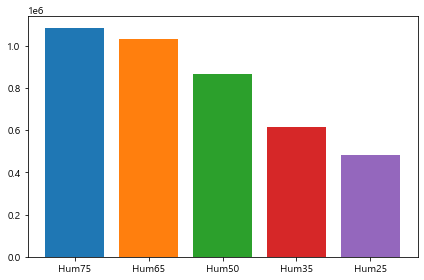

In [41]:
plt.bar('Hum75', df_hum75['발전량'].sum() / len(df_hum75))
plt.bar('Hum65', df_hum65['발전량'].sum() / len(df_hum65))
plt.bar('Hum50', df_hum50['발전량'].sum() / len(df_hum50))
plt.bar('Hum35', df_hum35['발전량'].sum() / len(df_hum35))
plt.bar('Hum25', df_hum25['발전량'].sum() / len(df_hum25))

plt.tight_layout()
plt.savefig('Hum75_25.png')
plt.show()

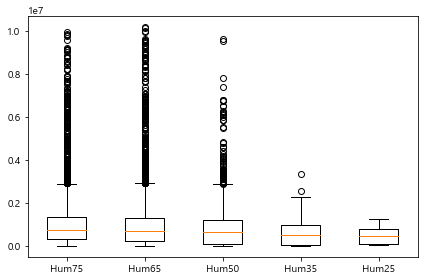

In [42]:
plt.boxplot([df_hum75['발전량'], df_hum65['발전량'], df_hum50['발전량'], df_hum35['발전량'], df_hum25['발전량']])

plt.xticks([1, 2, 3, 4, 5], ['Hum75', 'Hum65', 'Hum50', 'Hum35', 'Hum25'])
# plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Hum75_25_box.png')
plt.show()

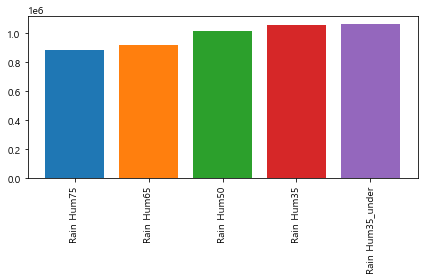

In [43]:
plt.bar('Rain Hum75', df_rain_hum75['발전량'].sum() / len(df_rain_hum75))
plt.bar('Rain Hum65', df_rain_hum65['발전량'].sum() / len(df_rain_hum65))
plt.bar('Rain Hum50', df_rain_hum50['발전량'].sum() / len(df_rain_hum50))
plt.bar('Rain Hum35', df_rain_hum35['발전량'].sum() / len(df_rain_hum35))
plt.bar('Rain Hum35_under', df_rain_hum35_under['발전량'].sum() / len(df_rain_hum35_under))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Rain Hum75_25.png')
plt.show()

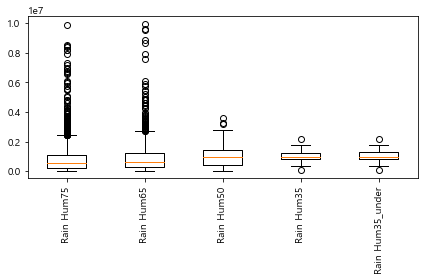

In [44]:
plt.boxplot([df_rain_hum75['발전량'], df_rain_hum65['발전량'], df_rain_hum50['발전량'], df_rain_hum35['발전량'], df_rain_hum35_under['발전량']])

plt.xticks([1, 2, 3, 4, 5], ['Rain Hum75', 'Rain Hum65', 'Rain Hum50', 'Rain Hum35', 'Rain Hum35_under'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Rain Hum75_25_box.png')
plt.show()

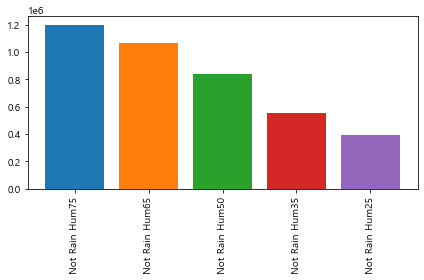

In [45]:
plt.bar('Not Rain Hum75', df_not_rain_hum75['발전량'].sum() / len(df_not_rain_hum75))
plt.bar('Not Rain Hum65', df_not_rain_hum65['발전량'].sum() / len(df_not_rain_hum65))
plt.bar('Not Rain Hum50', df_not_rain_hum50['발전량'].sum() / len(df_not_rain_hum50))
plt.bar('Not Rain Hum35', df_not_rain_hum35['발전량'].sum() / len(df_not_rain_hum35))
plt.bar('Not Rain Hum25', df_not_rain_hum25['발전량'].sum() / len(df_not_rain_hum25))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Not Rain Hum75_25.png')
plt.show()

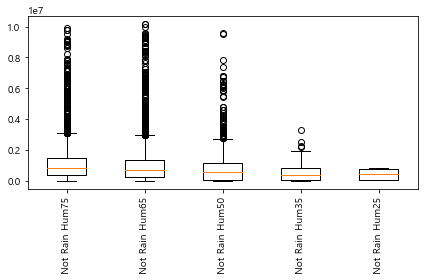

In [46]:
plt.boxplot([df_not_rain_hum75['발전량'], df_not_rain_hum65['발전량'], df_not_rain_hum50['발전량'], df_not_rain_hum35['발전량'], df_not_rain_hum25['발전량']])

plt.xticks([1, 2, 3, 4, 5], ['Not Rain Hum75', 'Not Rain Hum65', 'Not Rain Hum50', 'Not Rain Hum35', 'Not Rain Hum25'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Not Rain Hum75_25_box.png')
plt.show()

In [ ]:
plt.boxplot([df_hum75['발전량'], df_hum65['발전량'], df_hum50['발전량'], df_hum35['발전량'], df_hum25['발전량']])

plt.xticks(rotation=90)
plt.show()

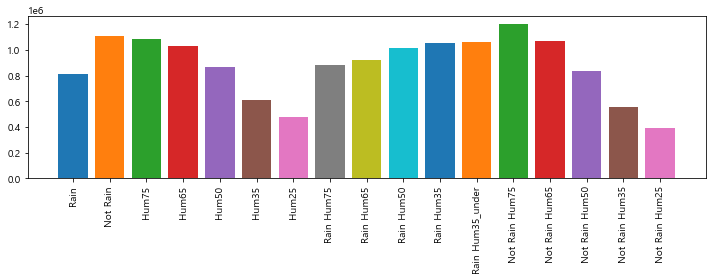

In [47]:
plt.figure(figsize=(10,4))
plt.bar('Rain', df_rain['발전량'].sum() / len(df_rain))
plt.bar('Not Rain', df_not_rain['발전량'].sum() / len(df_not_rain))

plt.bar('Hum75', df_hum75['발전량'].sum() / len(df_hum75))
plt.bar('Hum65', df_hum65['발전량'].sum() / len(df_hum65))
plt.bar('Hum50', df_hum50['발전량'].sum() / len(df_hum50))
plt.bar('Hum35', df_hum35['발전량'].sum() / len(df_hum35))
plt.bar('Hum25', df_hum25['발전량'].sum() / len(df_hum25))

plt.bar('Rain Hum75', df_rain_hum75['발전량'].sum() / len(df_rain_hum75))
plt.bar('Rain Hum65', df_rain_hum65['발전량'].sum() / len(df_rain_hum65))
plt.bar('Rain Hum50', df_rain_hum50['발전량'].sum() / len(df_rain_hum50))
plt.bar('Rain Hum35', df_rain_hum35['발전량'].sum() / len(df_rain_hum35))
plt.bar('Rain Hum35_under', df_rain_hum35_under['발전량'].sum() / len(df_rain_hum35_under))

plt.bar('Not Rain Hum75', df_not_rain_hum75['발전량'].sum() / len(df_not_rain_hum75))
plt.bar('Not Rain Hum65', df_not_rain_hum65['발전량'].sum() / len(df_not_rain_hum65))
plt.bar('Not Rain Hum50', df_not_rain_hum50['발전량'].sum() / len(df_not_rain_hum50))
plt.bar('Not Rain Hum35', df_not_rain_hum35['발전량'].sum() / len(df_not_rain_hum35))
plt.bar('Not Rain Hum25', df_not_rain_hum25['발전량'].sum() / len(df_not_rain_hum25))

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Hum75_25_total.png')
plt.show()

##### 상대습도 실효습도 비교를 해볼까?

In [86]:
df_hum75

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절,실효습도
0,강원도,2017-01-01,154918.180,2017,1,1.942857,-3.392857,70.821429,9.621429,5.064286,0.000000,1.478571,겨울,52.527418
1,강원도,2017-01-02,104640.902,2017,1,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000,겨울,54.839204
6,강원도,2017-01-07,229365.225,2017,1,2.400000,-2.107143,74.600000,9.707143,6.792857,0.035714,1.000000,겨울,60.561065
19,강원도,2017-01-20,27179.082,2017,1,-3.235714,-7.700000,73.035714,9.985714,1.350000,8.014286,1.764286,겨울,52.645612
20,강원도,2017-01-21,77521.873,2017,1,-5.328571,-10.135714,70.607143,10.007143,6.407143,0.114286,1.978571,겨울,55.198250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20073,충청북도,2021-12-19,560973.742,2021,12,0.375000,-4.950000,69.166667,9.683333,8.025000,0.800000,1.508333,겨울,56.530147
20074,충청북도,2021-12-20,403434.187,2021,12,5.150000,0.508333,73.541667,9.675000,3.075000,0.000000,1.350000,겨울,57.387314
20075,충청북도,2021-12-21,524109.667,2021,12,5.750000,1.141667,74.083333,9.683333,5.758333,0.000000,1.258333,겨울,58.267480
20078,충청북도,2021-12-24,303051.200,2021,12,0.858333,-3.941667,71.200000,9.675000,1.758333,0.000000,1.533333,겨울,56.278231


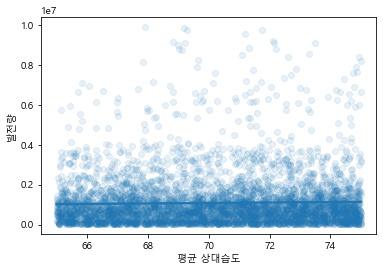

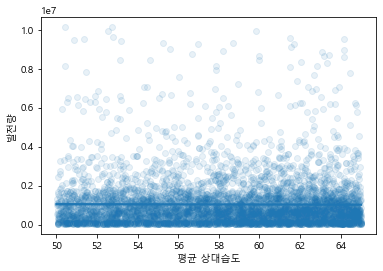

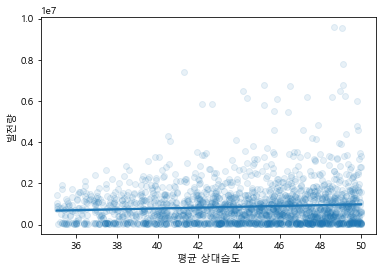

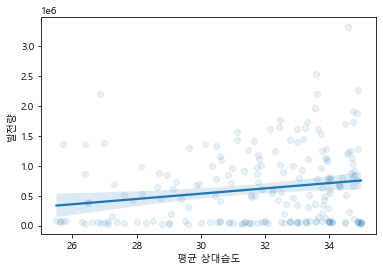

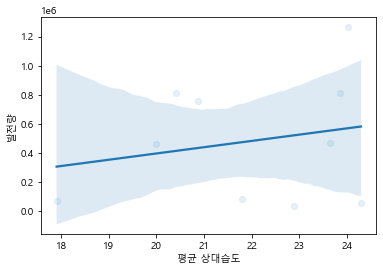

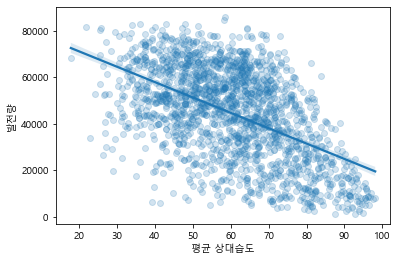

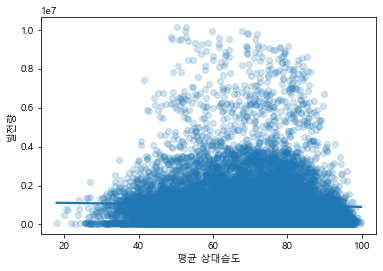

In [92]:
#plt.figure(figsize=(10,4))

sns.regplot(x='평균 상대습도',y='발전량', data=df_hum75, scatter_kws={'alpha':0.1})
plt.show()
sns.regplot(x='평균 상대습도',y='발전량', data=df_hum65, scatter_kws={'alpha':0.1})
plt.show()
sns.regplot(x='평균 상대습도',y='발전량', data=df_hum50, scatter_kws={'alpha':0.1})
plt.show()
sns.regplot(x='평균 상대습도',y='발전량', data=df_hum35, scatter_kws={'alpha':0.1})
plt.show()
sns.regplot(x='평균 상대습도',y='발전량', data=df_hum25, scatter_kws={'alpha':0.1})
plt.show()

sns.regplot(x='평균 상대습도',y='발전량', data=df_group[df_group['지역']== '서울시'], scatter_kws={'alpha':0.2})
plt.show()

sns.regplot(x='평균 상대습도',y='발전량', data=df_group, scatter_kws={'alpha':0.2})
plt.show()


# sns.regression(range(len(df_hum75['발전량'])), df_hum75['발전량'], alpha=0.2)
# plt.show()
# plt.regression(range(len(df_hum65['발전량'])), df_hum65['발전량'], alpha=0.2)
# plt.show()
# plt.regression(range(len(df_hum50['발전량'])), df_hum50['발전량'], alpha=0.2)
# plt.show()
# plt.regression(range(len(df_hum35['발전량'])), df_hum35['발전량'], alpha=0.2)
# plt.show()
# plt.regression(range(len(df_hum25['발전량'])), df_hum25['발전량'], alpha=0.2)
# plt.show()

# plt.subplot(1,2,2)
# plt.scatter(range(len(df_hum_he75['발전량'])), df_hum_he75['발전량'], alpha=0.2)
# plt.scatter(range(len(df_hum_he65['발전량'])), df_hum_he65['발전량'], alpha=0.2)
# plt.scatter(range(len(df_hum_he50['발전량'])), df_hum_he50['발전량'], alpha=0.2)
# plt.scatter(range(len(df_hum_he35['발전량'])), df_hum_he35['발전량'], alpha=0.2)
# plt.scatter(range(len(df_hum_he25['발전량'])), df_hum_he25['발전량'], alpha=0.2)

# plt.tight_layout()
# plt.savefig('Hum_HumH.png')
# plt.show()

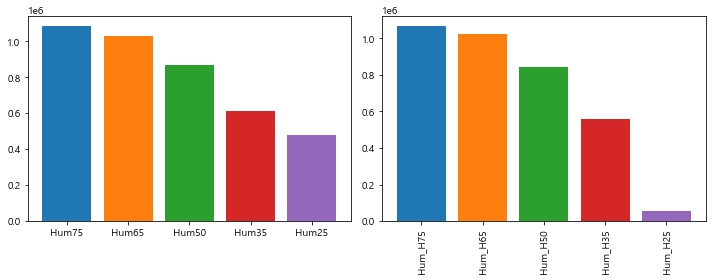

In [48]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar('Hum75', df_hum75['발전량'].sum() / len(df_hum75))
plt.bar('Hum65', df_hum65['발전량'].sum() / len(df_hum65))
plt.bar('Hum50', df_hum50['발전량'].sum() / len(df_hum50))
plt.bar('Hum35', df_hum35['발전량'].sum() / len(df_hum35))
plt.bar('Hum25', df_hum25['발전량'].sum() / len(df_hum25))

plt.subplot(1,2,2)
plt.bar('Hum_H75', df_hum_he75['발전량'].sum() / len(df_hum_he75))
plt.bar('Hum_H65', df_hum_he65['발전량'].sum() / len(df_hum_he65))
plt.bar('Hum_H50', df_hum_he50['발전량'].sum() / len(df_hum_he50))
plt.bar('Hum_H35', df_hum_he35['발전량'].sum() / len(df_hum_he35))
plt.bar('Hum_H25', df_hum_he25['발전량'].sum() / len(df_hum_he25))

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Hum_HumH.png')
plt.show()

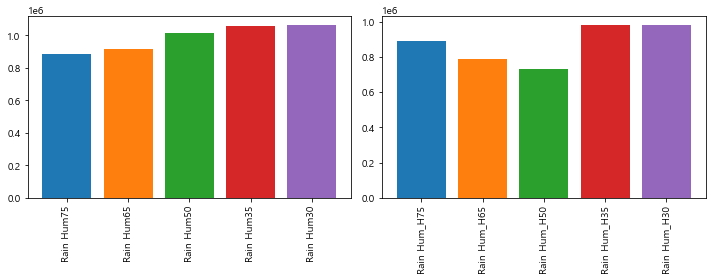

In [49]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar('Rain Hum75', df_rain_hum75['발전량'].sum() / len(df_rain_hum75))
plt.bar('Rain Hum65', df_rain_hum65['발전량'].sum() / len(df_rain_hum65))
plt.bar('Rain Hum50', df_rain_hum50['발전량'].sum() / len(df_rain_hum50))
plt.bar('Rain Hum35', df_rain_hum35['발전량'].sum() / len(df_rain_hum35))
plt.bar('Rain Hum30', df_rain_hum35_under['발전량'].sum() / len(df_rain_hum35_under))
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar('Rain Hum_H75', df_rain_hum_he75['발전량'].sum() / len(df_rain_hum_he75))
plt.bar('Rain Hum_H65', df_rain_hum_he65['발전량'].sum() / len(df_rain_hum_he65))
plt.bar('Rain Hum_H50', df_rain_hum_he50['발전량'].sum() / len(df_rain_hum_he50))
plt.bar('Rain Hum_H35', df_rain_hum_he35['발전량'].sum() / len(df_rain_hum_he35))
plt.bar('Rain Hum_H30', df_rain_hum_he35_under['발전량'].sum() / len(df_rain_hum_he35_under))
plt.xticks(rotation=90)

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Rain Hum_HumH.png')
plt.show()

In [72]:
df_group

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절,실효습도
0,강원도,2017-01-01,154918.180,2017,1,1.942857,-3.392857,70.821429,9.621429,5.064286,0.000000,1.478571,겨울,52.527418
1,강원도,2017-01-02,104640.902,2017,1,4.235714,-1.000000,71.207143,9.635714,4.157143,0.028571,2.000000,겨울,54.839204
2,강원도,2017-01-03,258526.982,2017,1,2.314286,-6.342857,58.150000,9.635714,7.392857,0.000000,1.814286,겨울,53.326879
3,강원도,2017-01-04,259588.645,2017,1,2.657143,-4.421429,62.942857,9.664286,7.692857,0.000000,1.414286,겨울,53.474173
4,강원도,2017-01-05,109151.179,2017,1,1.578571,-2.092857,78.457143,9.678571,0.892857,4.392857,1.464286,겨울,57.731675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,충청북도,2021-12-27,612336.293,2021,12,-5.733333,-11.675000,64.841667,9.683333,5.491667,0.250000,1.366667,겨울,50.034604
20082,충청북도,2021-12-28,260067.376,2021,12,-1.483333,-4.266667,82.183333,9.691667,0.600000,0.000000,0.641667,겨울,56.487573
20083,충청북도,2021-12-29,281289.137,2021,12,1.625000,-3.300000,71.508333,9.691667,1.783333,0.033333,1.500000,겨울,57.403826
20084,충청북도,2021-12-30,661147.861,2021,12,-1.883333,-9.341667,59.133333,9.708333,5.566667,0.825000,2.516667,겨울,55.281879


In [70]:
df_not_rain_hum_he75

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절,실효습도
186,강원도,2017-07-06,649949.435,2017,7,24.964286,19.042857,73.314286,14.671429,10.971429,0.0,1.157143,여름,65.351792
210,강원도,2017-07-30,463429.400,2017,7,24.592857,20.635714,80.457143,14.164286,5.478571,0.0,1.257143,여름,68.903479
214,강원도,2017-08-03,625606.814,2017,8,25.342857,20.050000,75.071429,14.021429,10.142857,0.0,1.621429,여름,66.905382
215,강원도,2017-08-04,589980.240,2017,8,26.335714,21.842857,78.821429,14.000000,9.435714,0.0,1.200000,여름,66.423466
236,강원도,2017-08-25,496405.218,2017,8,23.757143,16.342857,67.642857,13.285714,9.071429,0.0,1.414286,여름,65.664842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19998,충청북도,2021-10-05,973624.645,2021,10,22.258333,17.916667,78.958333,11.700000,8.525000,0.0,1.183333,가을,65.920001
20006,충청북도,2021-10-13,786336.071,2021,10,18.500000,14.091667,76.875000,11.400000,4.891667,0.0,1.608333,가을,67.669701
20007,충청북도,2021-10-14,874108.224,2021,10,18.441667,14.441667,79.883333,11.300000,8.308333,0.0,0.966667,가을,67.076157
20044,충청북도,2021-11-20,537726.158,2021,11,9.625000,7.050000,86.116667,10.100000,4.891667,0.0,0.658333,가을,67.355712


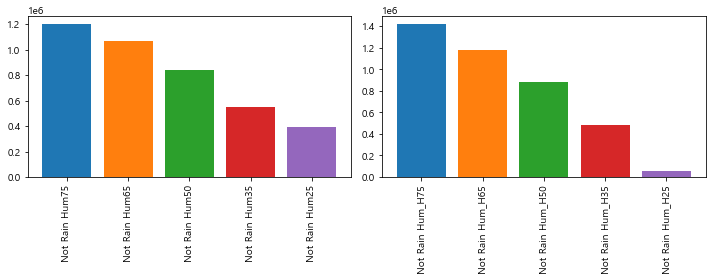

In [50]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar('Not Rain Hum75', df_not_rain_hum75['발전량'].sum() / len(df_not_rain_hum75))
plt.bar('Not Rain Hum65', df_not_rain_hum65['발전량'].sum() / len(df_not_rain_hum65))
plt.bar('Not Rain Hum50', df_not_rain_hum50['발전량'].sum() / len(df_not_rain_hum50))
plt.bar('Not Rain Hum35', df_not_rain_hum35['발전량'].sum() / len(df_not_rain_hum35))
plt.bar('Not Rain Hum25', df_not_rain_hum25['발전량'].sum() / len(df_not_rain_hum25))
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar('Not Rain Hum_H75', df_not_rain_hum_he75['발전량'].sum() / len(df_not_rain_hum_he75))
plt.bar('Not Rain Hum_H65', df_not_rain_hum_he65['발전량'].sum() / len(df_not_rain_hum_he65))
plt.bar('Not Rain Hum_H50', df_not_rain_hum_he50['발전량'].sum() / len(df_not_rain_hum_he50))
plt.bar('Not Rain Hum_H35', df_not_rain_hum_he35['발전량'].sum() / len(df_not_rain_hum_he35))
plt.bar('Not Rain Hum_H25', df_not_rain_hum_he25['발전량'].sum() / len(df_not_rain_hum_he25))
plt.xticks(rotation=90)

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Not Rain Hum_HumH.png')
plt.show()

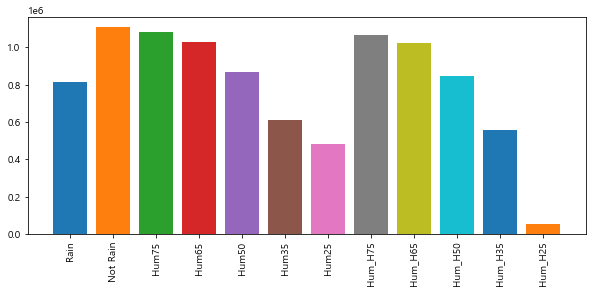

In [279]:
plt.figure(figsize=(10,4))
plt.bar('Rain', df_rain['발전량'].sum() / len(df_rain))
plt.bar('Not Rain', df_not_rain['발전량'].sum() / len(df_not_rain))

plt.bar('Hum75', df_hum75['발전량'].sum() / len(df_hum75))
plt.bar('Hum65', df_hum65['발전량'].sum() / len(df_hum65))
plt.bar('Hum50', df_hum50['발전량'].sum() / len(df_hum50))
plt.bar('Hum35', df_hum35['발전량'].sum() / len(df_hum35))
plt.bar('Hum25', df_hum25['발전량'].sum() / len(df_hum25))

plt.bar('Hum_H75', df_hum_he75['발전량'].sum() / len(df_hum_he75))
plt.bar('Hum_H65', df_hum_he65['발전량'].sum() / len(df_hum_he65))
plt.bar('Hum_H50', df_hum_he50['발전량'].sum() / len(df_hum_he50))
plt.bar('Hum_H35', df_hum_he35['발전량'].sum() / len(df_hum_he35))
plt.bar('Hum_H25', df_hum_he25['발전량'].sum() / len(df_hum_he25))
plt.xticks(rotation=90)
plt.show()

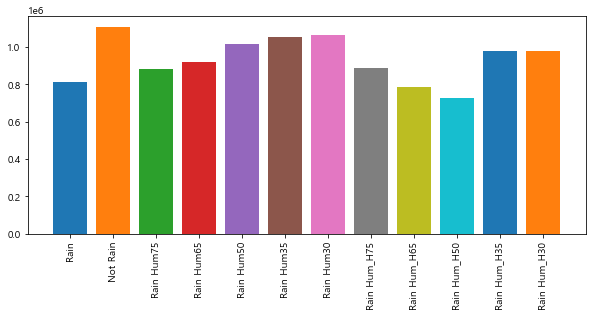

In [51]:
plt.figure(figsize=(10,4))
plt.bar('Rain', df_rain['발전량'].sum() / len(df_rain))
plt.bar('Not Rain', df_not_rain['발전량'].sum() / len(df_not_rain))

plt.bar('Rain Hum75', df_rain_hum75['발전량'].sum() / len(df_rain_hum75))
plt.bar('Rain Hum65', df_rain_hum65['발전량'].sum() / len(df_rain_hum65))
plt.bar('Rain Hum50', df_rain_hum50['발전량'].sum() / len(df_rain_hum50))
plt.bar('Rain Hum35', df_rain_hum35['발전량'].sum() / len(df_rain_hum35))
plt.bar('Rain Hum30', df_rain_hum35_under['발전량'].sum() / len(df_rain_hum35_under))
plt.xticks(rotation=90)

plt.bar('Rain Hum_H75', df_rain_hum_he75['발전량'].sum() / len(df_rain_hum_he75))
plt.bar('Rain Hum_H65', df_rain_hum_he65['발전량'].sum() / len(df_rain_hum_he65))
plt.bar('Rain Hum_H50', df_rain_hum_he50['발전량'].sum() / len(df_rain_hum_he50))
plt.bar('Rain Hum_H35', df_rain_hum_he35['발전량'].sum() / len(df_rain_hum_he35))
plt.bar('Rain Hum_H30', df_rain_hum_he35_under['발전량'].sum() / len(df_rain_hum_he35_under))
plt.xticks(rotation=90)
plt.show()

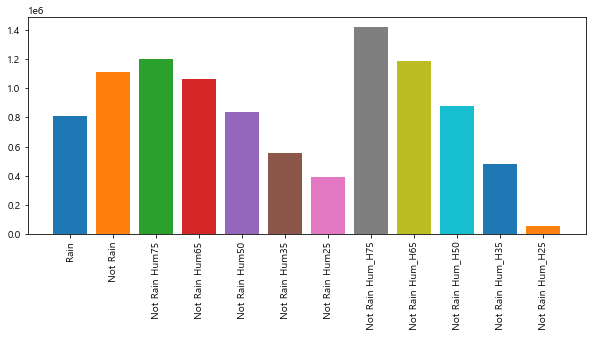

In [245]:
plt.figure(figsize=(10,4))
plt.bar('Rain', df_rain['발전량'].sum() / len(df_rain))
plt.bar('Not Rain', df_not_rain['발전량'].sum() / len(df_not_rain))

plt.bar('Not Rain Hum75', df_not_rain_hum75['발전량'].sum() / len(df_not_rain_hum75))
plt.bar('Not Rain Hum65', df_not_rain_hum65['발전량'].sum() / len(df_not_rain_hum65))
plt.bar('Not Rain Hum50', df_not_rain_hum50['발전량'].sum() / len(df_not_rain_hum50))
plt.bar('Not Rain Hum35', df_not_rain_hum35['발전량'].sum() / len(df_not_rain_hum35))
plt.bar('Not Rain Hum25', df_not_rain_hum25['발전량'].sum() / len(df_not_rain_hum25))
plt.xticks(rotation=90)

plt.bar('Not Rain Hum_H75', df_not_rain_hum_he75['발전량'].sum() / len(df_not_rain_hum_he75))
plt.bar('Not Rain Hum_H65', df_not_rain_hum_he65['발전량'].sum() / len(df_not_rain_hum_he65))
plt.bar('Not Rain Hum_H50', df_not_rain_hum_he50['발전량'].sum() / len(df_not_rain_hum_he50))
plt.bar('Not Rain Hum_H35', df_not_rain_hum_he35['발전량'].sum() / len(df_not_rain_hum_he35))
plt.bar('Not Rain Hum_H25', df_not_rain_hum_he25['발전량'].sum() / len(df_not_rain_hum_he25))
plt.xticks(rotation=90)
plt.show()

In [277]:
(df_rain['발전량'].sum() / len(df_rain)) / (df_not_rain_hum_he75['발전량'].sum() / len(df_not_rain_hum_he75))

0.5719925453609488

In [278]:
8.5258 / 14.5703

0.5851492419510923

In [ ]:
0.73

In [ ]:
0.01

팩트1. 비가 오면 효율이 떨어진다  
팩트2. 상대 습도가 높을수록 효율이 올라간다?  
팩트3. 실효 습도가 높을수록 효율이 올라간다?  
팩트4. 비가 오든 안오든 습도가 높으면 이상치가 급격히 많아진다  
  
추론1. 
논문에서 건조의 기준이 없는데 건조의 기준을 비를 맞았냐로 잡았다면  
비가안오고 실효습도 65< x <=75를 최대효율  
비가 온 날을 최소효율로 잡았을 때  
논문과 수치가 매우 유사하게 나온다.  

In [266]:
df_not_rain_hum_he75.to_csv('df_not_rain_hum_he75.csv', encoding='euc-kr', index=False)

In [267]:
df_rain.to_csv('df_rain.csv', encoding='euc-kr', index=False)

<AxesSubplot:xlabel='지역'>

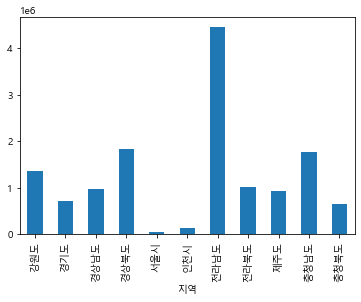

In [257]:
df_not_rain_hum_he75.groupby('지역')['발전량'].mean().plot(kind='bar')

<AxesSubplot:xlabel='지역'>

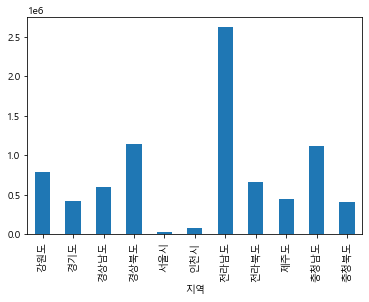

In [258]:
df_rain.groupby('지역')['발전량'].mean().plot(kind='bar')

In [260]:
df_rain['지역'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '서울시', '인천시', '전라남도', '전라북도', '제주도',
       '충청남도', '충청북도'], dtype=object)

In [53]:
tmp = ['강원도', '경기도', '경상남도', '경상북도', '서울시', '인천시', '전라남도', '전라북도', '제주도', '충청남도', '충청북도']
tmph = ['강원도h', '경기도h', '경상남도h', '경상북도h', '서울시h', '인천시h', '전라남도h', '전라북도h', '제주도h', '충청남도h', '충청북도h']

In [264]:
list(df_rain.groupby('지역')['발전량'].mean().values)

array([ 788755.42725026,  419550.33952712,  594026.23777395,
       1142234.02588566,   28615.31253131,   78748.74887848,
       2620249.77333144,  661739.61743221,  453901.15626065,
       1114627.20450497,  408301.32050359])

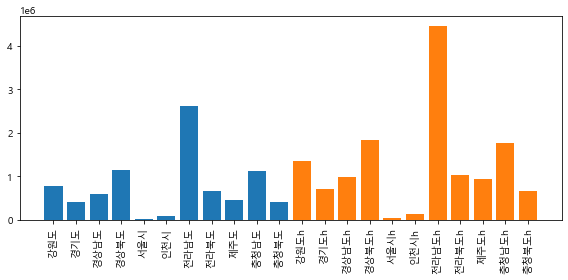

In [54]:
plt.figure(figsize=(8,4))
plt.bar(tmp, list(df_rain.groupby('지역')['발전량'].mean().values))
plt.bar(tmph, list(df_not_rain_hum_he75.groupby('지역')['발전량'].mean().values))
plt.xticks(rotation=90)

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('df_rain df_not_rain_hum_he75 지역별 평균 발전량.png')
plt.show()

In [305]:
area_mean_ls = []
area_rain_ls = list(df_rain.groupby('지역')['발전량'].mean().values)
area_not_rain_he75 = list(df_not_rain_hum_he75.groupby('지역')['발전량'].mean().values)

for idx in range(len(area_rain_ls)):
    area_mean_ls.append(area_rain_ls[idx] / area_not_rain_he75[idx])

전국 평균 0.5719925453609488

In [306]:
area_mean_ls

[0.5802622852969311,
 0.5905743222124771,
 0.6083543021815059,
 0.6196694464077628,
 0.6193432904163924,
 0.6089647364011281,
 0.5881688193460135,
 0.6480302256761936,
 0.4818473776078689,
 0.6288175536538233,
 0.6199214229445048]

{'whiskers': [<matplotlib.lines.Line2D at 0x20fb64b52a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20fb64b64a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fb64b4310>],
 'medians': [<matplotlib.lines.Line2D at 0x20fb64b6e60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fb64b71f0>],
 'means': []}

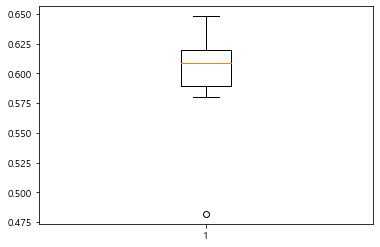

In [307]:
plt.boxplot(area_mean_ls)

##### 이상치 쳐내기

In [ ]:
df_hum_he75
df_hum_he65
df_hum_he50
df_hum_he35
df_hum_he25

df_rain_hum_he75
df_rain_hum_he65
df_rain_hum_he50
df_rain_hum_he35
df_rain_hum_he35_under

df_not_rain_hum_he75
df_not_rain_hum_he65
df_not_rain_hum_he50
df_not_rain_hum_he35
df_not_rain_hum_he25

In [ ]:
df_hum75
df_hum65
df_hum50
df_hum35
df_hum25

df_rain_hum75
df_rain_hum65
df_rain_hum50
df_rain_hum35
df_rain_hum35_under

df_not_rain_hum75
df_not_rain_hum65
df_not_rain_hum50
df_not_rain_hum35
df_not_rain_hum25

In [310]:
df_hum_he65.describe()['발전량']

count    1.018100e+04
mean     1.025463e+06
std      1.230957e+06
min      1.060051e+03
25%      2.524003e+05
50%      6.765897e+05
75%      1.277900e+06
max      1.015185e+07
Name: 발전량, dtype: float64

In [316]:
df_hum_he65.describe()['발전량'][4]

252400.288

In [317]:
df_hum_he65.describe()['발전량'][6]

1277900.098

In [331]:
per25 = df_hum_he65.describe()['발전량'][4]
per75 = df_hum_he65.describe()['발전량'][6]
con25 = (per25 <= df_hum_he65['발전량'])
con75 = (df_hum_he65['발전량'] <= per75)

In [332]:
df_hum_he65[con25 & con75]

,지역,일시,발전량,년,월,평균 기온,평균 이슬점온도,평균 상대습도,가조시간,합계 일조 시간,일강수량,평균 풍속,계절,실효습도
2,강원도,2017-01-03,258526.982,2017,1,2.314286,-6.342857,58.150000,9.635714,7.392857,0.000000,1.814286,겨울,53.326879
3,강원도,2017-01-04,259588.645,2017,1,2.657143,-4.421429,62.942857,9.664286,7.692857,0.000000,1.414286,겨울,53.474173
5,강원도,2017-01-06,277486.341,2017,1,2.857143,-1.342857,76.107143,9.685714,7.221429,0.207143,0.978571,겨울,59.673428
31,강원도,2017-02-01,371209.995,2017,2,-3.700000,-14.064286,48.885714,10.321429,8.450000,0.000000,2.135714,겨울,50.098956
53,강원도,2017-02-23,372219.462,2017,2,0.700000,-7.471429,56.950000,11.107143,7.100000,0.014286,2.471429,겨울,51.531783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,충청북도,2021-12-27,612336.293,2021,12,-5.733333,-11.675000,64.841667,9.683333,5.491667,0.250000,1.366667,겨울,50.034604
20082,충청북도,2021-12-28,260067.376,2021,12,-1.483333,-4.266667,82.183333,9.691667,0.600000,0.000000,0.641667,겨울,56.487573
20083,충청북도,2021-12-29,281289.137,2021,12,1.625000,-3.300000,71.508333,9.691667,1.783333,0.033333,1.500000,겨울,57.403826
20084,충청북도,2021-12-30,661147.861,2021,12,-1.883333,-9.341667,59.133333,9.708333,5.566667,0.825000,2.516667,겨울,55.281879


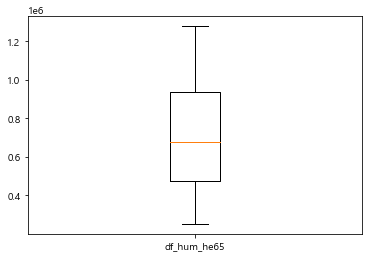

In [339]:
plt.boxplot(df_hum_he65[con25 & con75]['발전량'])
plt.xticks([1],['df_hum_he65'])
plt.show()

In [55]:
df_hum_he_ls = [
    df_hum_he75,
    df_hum_he65,
    df_hum_he50,
    df_hum_he35,
    df_hum_he25,
    df_rain_hum_he75,
    df_rain_hum_he65,
    df_rain_hum_he50,
    df_rain_hum_he35,
    df_rain_hum_he35_under,
    df_not_rain_hum_he75,
    df_not_rain_hum_he65,
    df_not_rain_hum_he50,
    df_not_rain_hum_he35,
    df_not_rain_hum_he25
]

In [56]:
df_hum_ls = [
    df_hum75,
    df_hum65,
    df_hum50,
    df_hum35,
    df_hum25,
    df_rain_hum75,
    df_rain_hum65,
    df_rain_hum50,
    df_rain_hum35,
    df_rain_hum35_under,
    df_not_rain_hum75,
    df_not_rain_hum65,
    df_not_rain_hum50,
    df_not_rain_hum35,
    df_not_rain_hum25
]

In [57]:
df_hum_he_avg_ls = []

for df_hum_he in df_hum_he_ls:
    per25 = df_hum_he.describe()['발전량'][4]
    per75 = df_hum_he.describe()['발전량'][6]
    con25 = (per25 <= df_hum_he['발전량'])
    con75 = (df_hum_he['발전량'] <= per75)
    df_hum_he_avg_ls.append(df_hum_he[con25 & con75])

In [58]:
df_hum_avg_ls = []

for df_hum in df_hum_ls:
    per25 = df_hum.describe()['발전량'][4]
    per75 = df_hum.describe()['발전량'][6]
    con25 = (per25 <= df_hum['발전량'])
    con75 = (df_hum['발전량'] <= per75)
    df_hum_avg_ls.append(df_hum[con25 & con75])

##### 이상치 개수, 비율

In [372]:
for idx in range(len(df_hum_he_ls)):
    print(len(df_hum_he_ls[idx]) - len(df_hum_he_avg_ls[idx]), '\t', len(df_hum_he_avg_ls[idx]) / len(df_hum_he_ls[idx]))

2374 	 0.49989467031809565
5090 	 0.500049111089284
2156 	 0.4997679814385151
168 	 0.5
0 	 1.0
1582 	 0.49984192222573504
2030 	 0.49975357318876296
502 	 0.5
26 	 0.5
26 	 0.5
792 	 0.5
3062 	 0.4999183406826719
1654 	 0.499697519661222
142 	 0.5
0 	 1.0


In [373]:
for idx in range(len(df_hum_ls)):
    print(len(df_hum_ls[idx]) - len(df_hum_avg_ls[idx]), '\t', len(df_hum_avg_ls[idx]) / len(df_hum_ls[idx]))

2462 	 0.49989843591306116
2608 	 0.5000958405213725
1012 	 0.49975284231339595
104 	 0.4975845410628019
6 	 0.4
904 	 0.5002763957987839
628 	 0.49920255183413076
160 	 0.5015576323987538
12 	 0.52
14 	 0.46153846153846156
1558 	 0.49967886962106617
1982 	 0.4998738329548322
852 	 0.4994124559341951
92 	 0.4945054945054945
4 	 0.5555555555555556


##### 그려보기

In [59]:
tmp1 = []
for i in df_hum_he_avg_ls:
    tmp1.append(i['발전량'])

In [60]:
tmp2 = []
for i in df_hum_avg_ls:
    tmp2.append(i['발전량'])

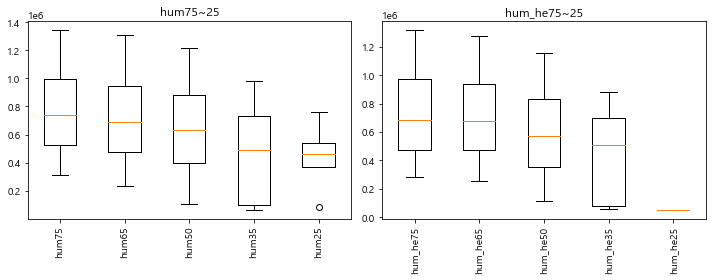

In [67]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot([tmp2[0], tmp2[1], tmp2[2], tmp2[3], tmp2[4]])
plt.title('hum75~25')
plt.xticks([1, 2, 3, 4, 5], ['hum75', 'hum65', 'hum50', 'hum35', 'hum25'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.boxplot([tmp1[0], tmp1[1], tmp1[2], tmp1[3], tmp1[4]])
plt.title('hum_he75~25')
plt.xticks([1, 2, 3, 4, 5], ['hum_he75', 'hum_he65', 'hum_he50', 'hum_he35', 'hum_he25'])
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('이상치 없앤 Hum_box.png')
plt.show()

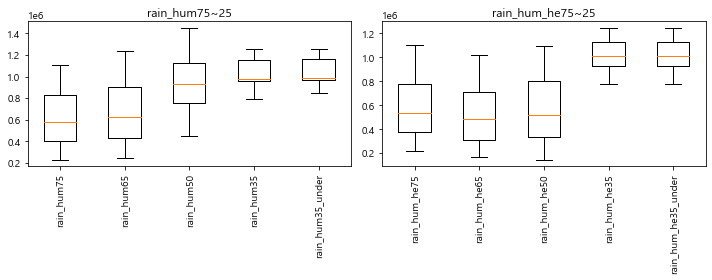

In [68]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot([rain_hum75, rain_hum65, rain_hum50, rain_hum35, rain_hum35_under)
plt.title('rain_hum75~25')
plt.xticks([1, 2, 3, 4, 5], ['rain_hum75', 'rain_hum65', 'rain_hum50', 'rain_hum35', 'rain_hum35_under'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.boxplot([rain_hum_he75, rain_hum_he65, rain_hum_he50, rain_hum_he35, rain_hum_he35_under])
plt.title('rain_hum_he75~25')
plt.xticks([1, 2, 3, 4, 5], ['rain_hum_he75', 'rain_hum_he65', 'rain_hum_he50', 'rain_hum_he35', 'rain_hum_he35_under'])
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('이상치 없앤 Rain_Hum_box.png')
plt.show()

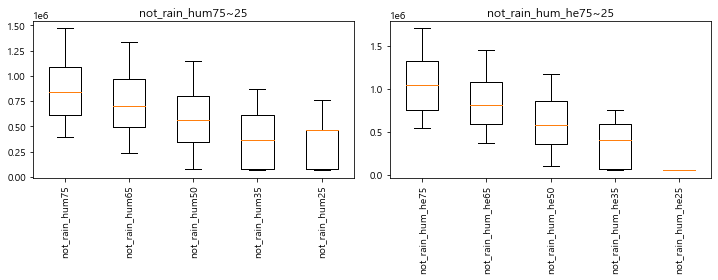

In [69]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot([not_rain_hum75, not_rain_hum65, not_rain_hum50, not_rain_hum35, not_rain_hum25])
plt.title('not_rain_hum75~25')
plt.xticks([1, 2, 3, 4, 5], ['not_rain_hum75', 'not_rain_hum65', 'not_rain_hum50', 'not_rain_hum35', 'not_rain_hum25'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.boxplot([not_rain_hum_he75, not_rain_hum_he65, not_rain_hum_he50, not_rain_hum_he35, not_rain_hum_he25])
plt.title('not_rain_hum_he75~25')
plt.xticks([1, 2, 3, 4, 5], ['not_rain_hum_he75', 'not_rain_hum_he65', 'not_rain_hum_he50', 'not_rain_hum_he35', 'not_rain_hum_he25'])
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('이상치 없앤 Not_Rain_Hum_box.png')
plt.show()

1.비가 오면 효율이 떨어진다  
2.비가 오든 안오든 습도가 높으면 이상치가 급격히 많아진다  
3.상대습도든 실효습도든 높아지면 전반적으로 효율이 약간 올라간다  
4.비가 온날은 습도가 낮아야 효율이 올라간다  
5.비가 안온날은 습도가 높아야 효율이 올라간다  
  
추론 -> 4,5로 보면 비가 올때 달라지는 환경 변수 때문에 습도에 따른 발전 효율 양상이 달라진다.     

In [ ]:
1.비가 오면 효율이 떨어진다
2.비가 오든 안오든 습도가 높으면 이상치가 급격히 많아진다